In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
df = pd.read_csv(r"C:\Users\bhuvan kumar\Downloads\List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data Cleaning

In [104]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')

In [105]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [106]:
df.rename(columns= {'Production (Tons)' : 'Production(Tons)'} , inplace= True)
df.rename(columns= {'Production per Person (Kg)' : 'Production_per_Person(Kg)'} , inplace= True)
df.rename(columns= {'Acreage (Hectare)' : 'Acreage(Hectare)'} , inplace= True)
df.rename(columns= {'Yield (Kg / Hectare)' : 'Yield(Kg/Hectare)'} , inplace= True)
df.rename(columns= {'Unnamed: 0' : 'Unnamed'} , inplace= True)
df.rename(columns= {'index' : 'index'} , inplace= True)


In [107]:
df.head()

,Unnamed,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [108]:
df.isna().sum()

Unnamed                      0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [109]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [110]:
df=df.dropna().reset_index()

In [111]:
df.isna().sum()

index                        0
Unnamed                      0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [112]:
df.head()

,index,Unnamed,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [143]:
df.drop("Unnamed",axis = 1,inplace = True)

KeyError: "['Unnamed'] not found in axis"

In [144]:
df.columns

Index(['Country', 'Continent', 'Production(Tons)', 'Production_per_Person(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [145]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [146]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [147]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [148]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [149]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Continent'>

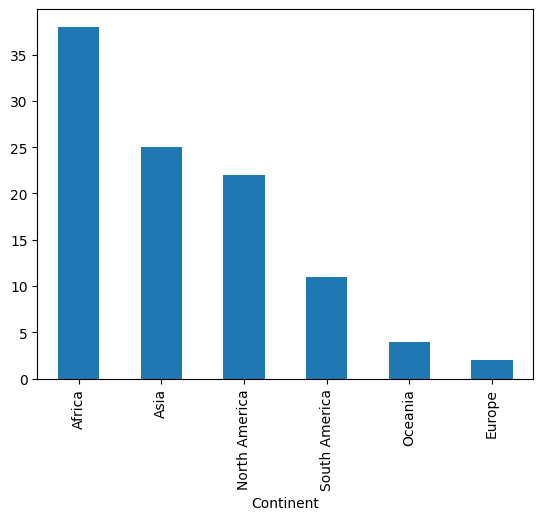

In [150]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\881815454.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\881815454.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C

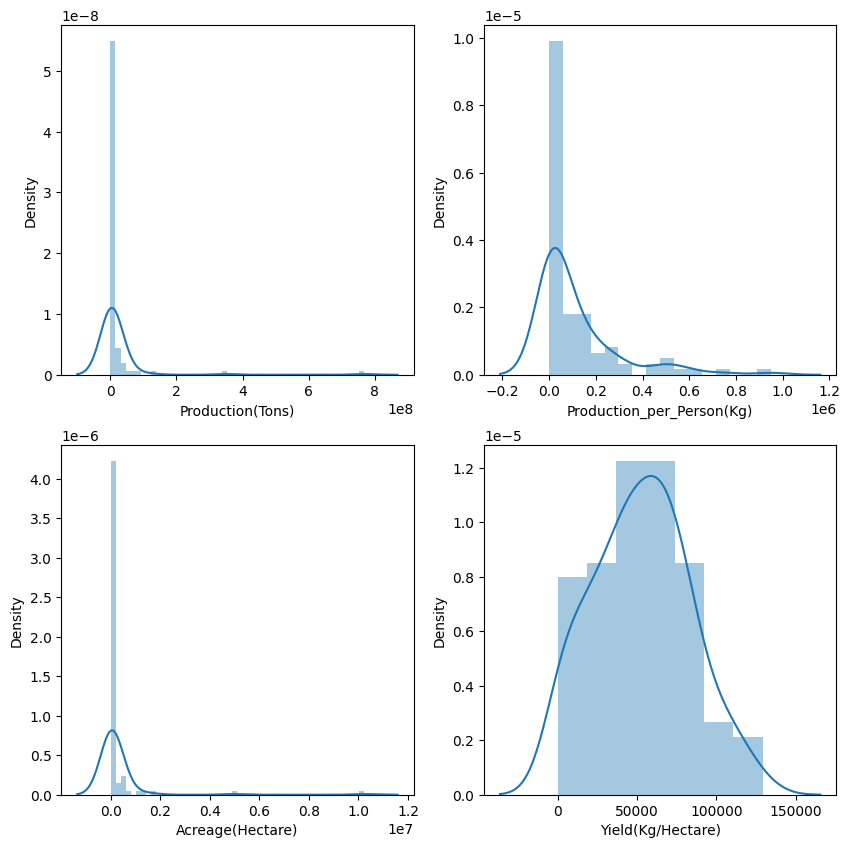

In [151]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])
plt.show()

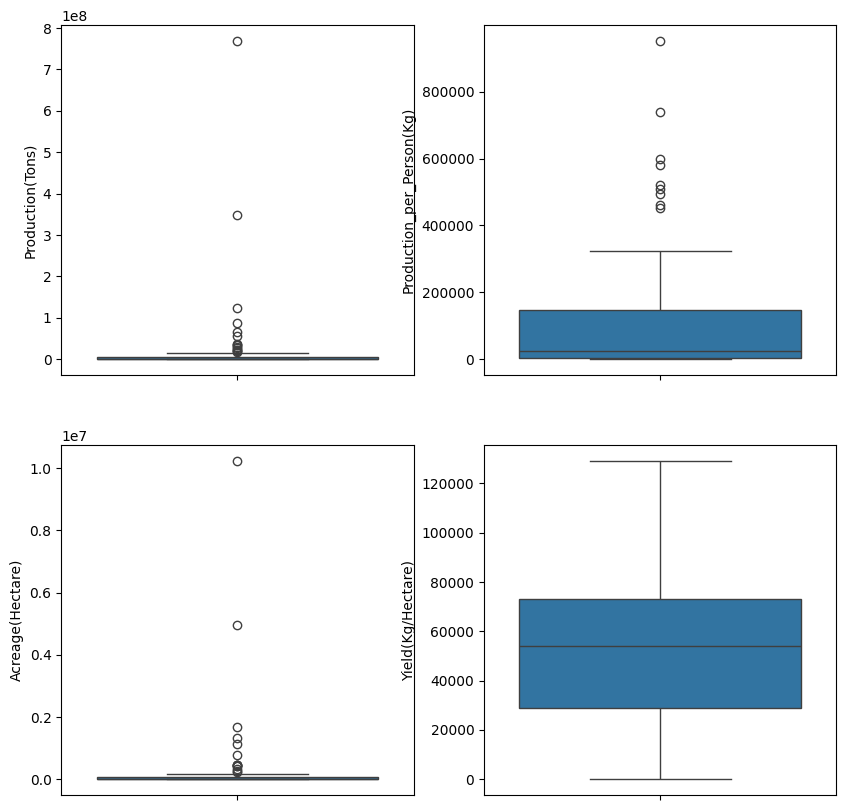

In [152]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.show()

In [153]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [154]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [155]:
df_new = df[['Country','Production(Tons)']].set_index('Country')
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [156]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [157]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

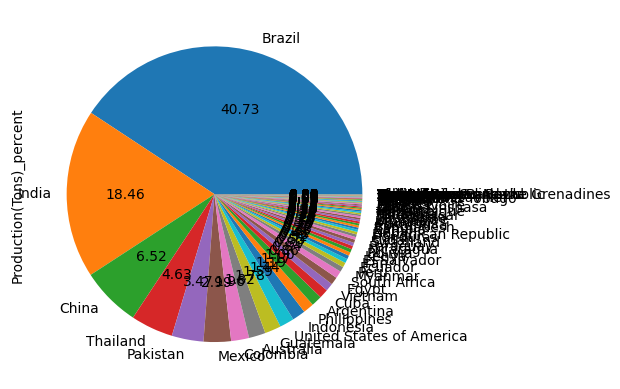

In [158]:
df_new['Production(Tons)_percent'].plot(kind = 'pie',autopct="%.2f")

<Axes: xlabel='Country'>

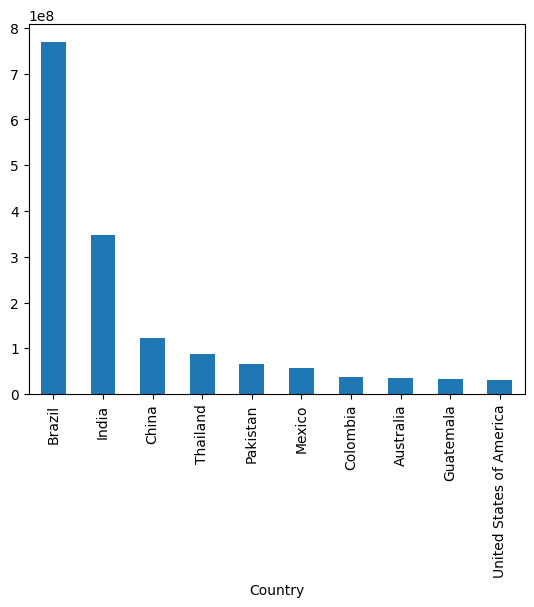

In [159]:
df_new['Production(Tons)'].head(10).plot(kind = 'bar')

In [160]:
df_new.loc[df_new['Production(Tons)'].idxmin()]

Production(Tons)            1.000000e+00
Production(Tons)_percent    5.298352e-08
Name: Syria, dtype: float64

In [161]:
df_new.loc[df_new['Production(Tons)'].idxmax()]

Production(Tons)            7.686784e+08
Production(Tons)_percent    4.072729e+01
Name: Brazil, dtype: float64

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\1370538802.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


AttributeError: 'NoneType' object has no attribute 'remove'

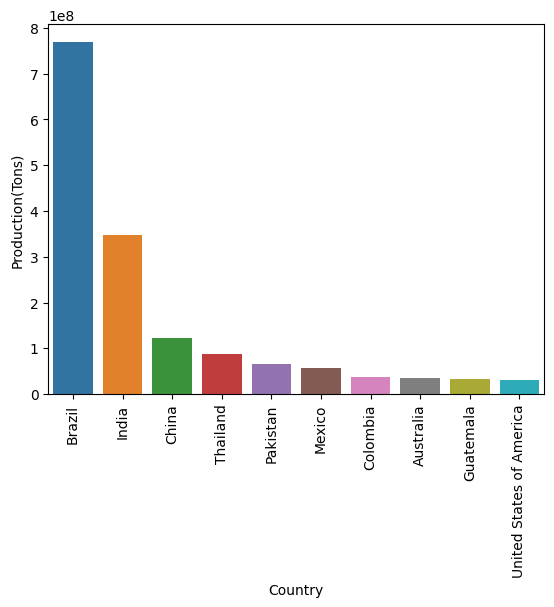

In [162]:
ax=sns.barplot(data=df.head(10),x='Country',y='Production(Tons)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.legend_.remove()
plt.show()

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\4244765501.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


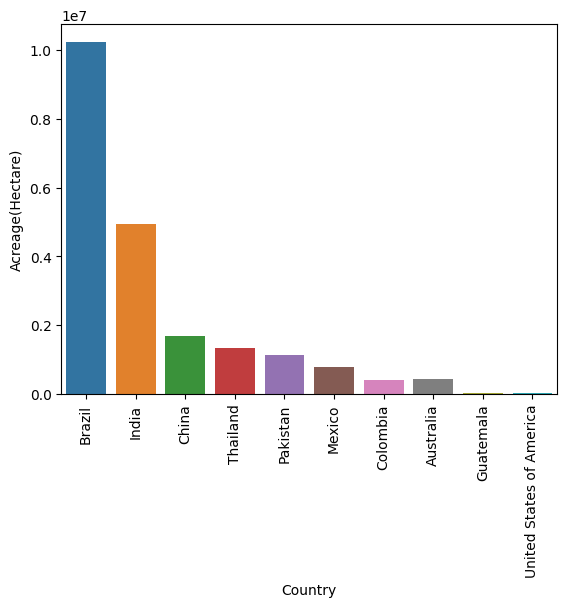

In [163]:
ax=sns.barplot(data=df.head(10),x='Country',y='Acreage(Hectare)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [164]:
de_acr=df.sort_values(by='Acreage(Hectare)',ascending=False)

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\2872950555.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)


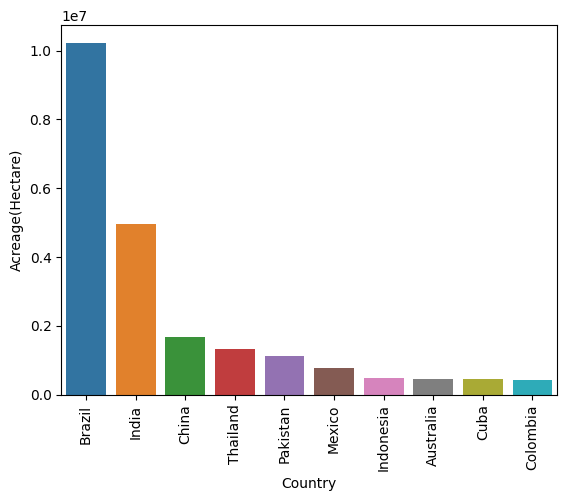

In [165]:
ax1=sns.barplot(data=de_acr.head(10),x='Country',y='Acreage(Hectare)',hue='Country')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\2545982297.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)


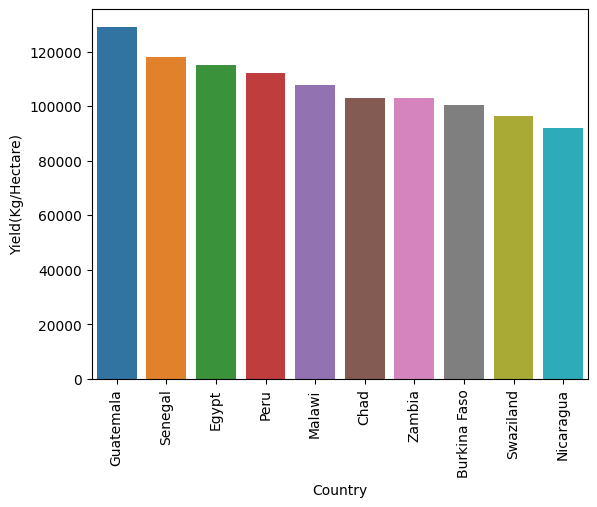

In [166]:
de_yield=df.sort_values(by='Yield(Kg/Hectare)',ascending=False)
ax1=sns.barplot(data=de_yield.head(10),x='Country',y='Yield(Kg/Hectare)',hue='Country')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\bhuvan kumar\AppData\Local\Temp\ipykernel_22248\3267242770.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)


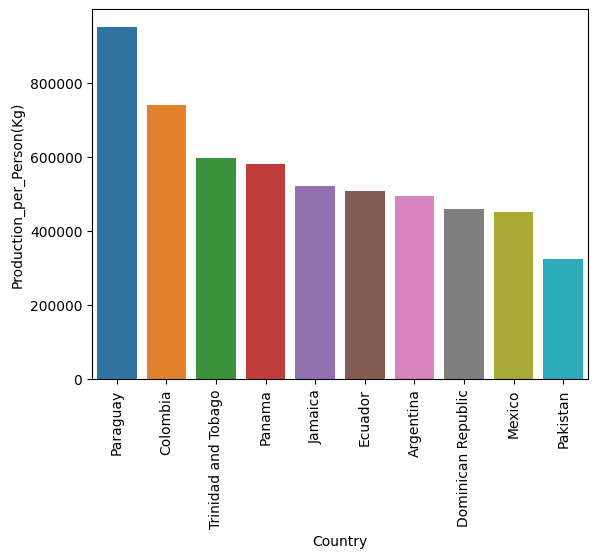

In [167]:
de11=df.sort_values(by='Production_per_Person(Kg)',ascending=False)
ax1=sns.barplot(data=de11.head(10),x='Country',y='Production_per_Person(Kg)',hue='Country')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.show()

In [168]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

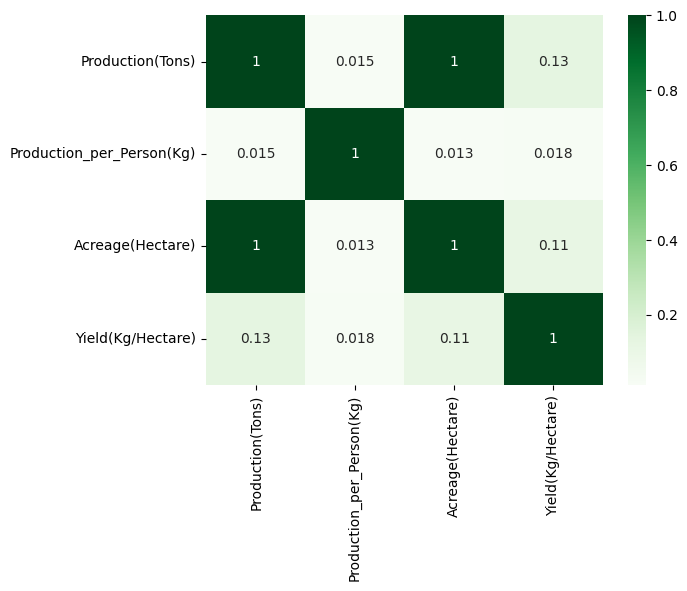

In [170]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Greens')

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

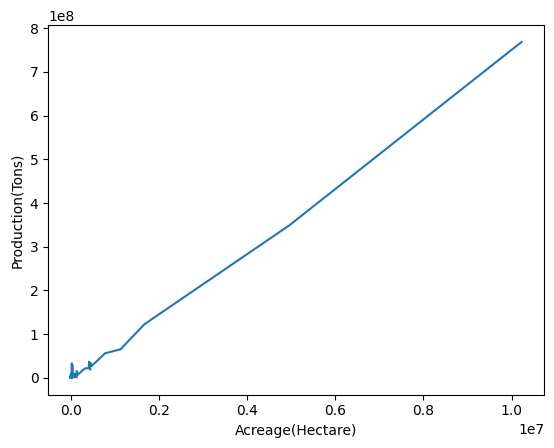

In [174]:
sns.lineplot(data=df , x='Acreage(Hectare)', y='Production(Tons)')

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

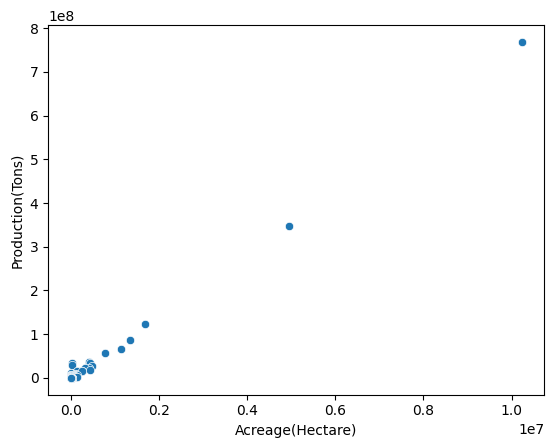

In [176]:
sns.scatterplot(data=df , x='Acreage(Hectare)', y='Production(Tons)')

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

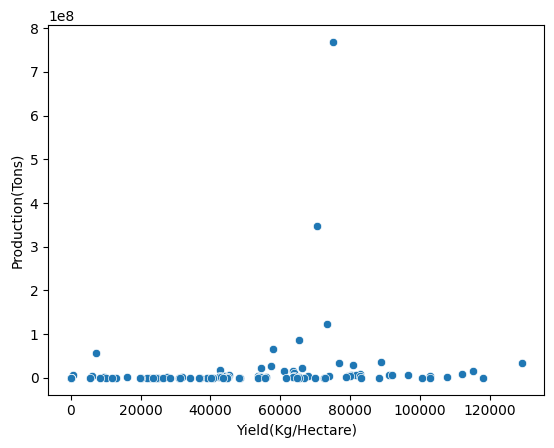

In [177]:
sns.scatterplot(data=df , x='Yield(Kg/Hectare)', y='Production(Tons)')

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

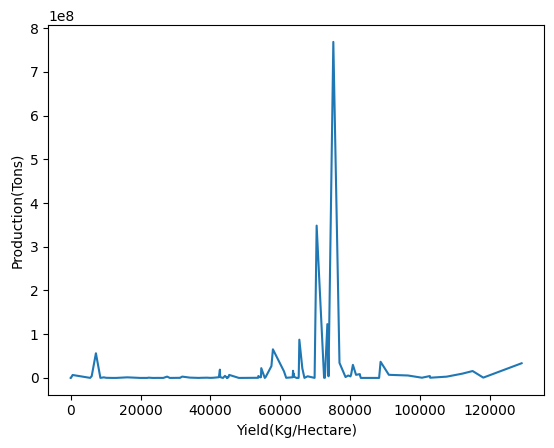

In [178]:
sns.lineplot(data=df , x='Yield(Kg/Hectare)', y='Production(Tons)')

## Analysis For Continent

In [186]:
df_con=df.groupby('Continent').sum()

<Axes: xlabel='Continent'>

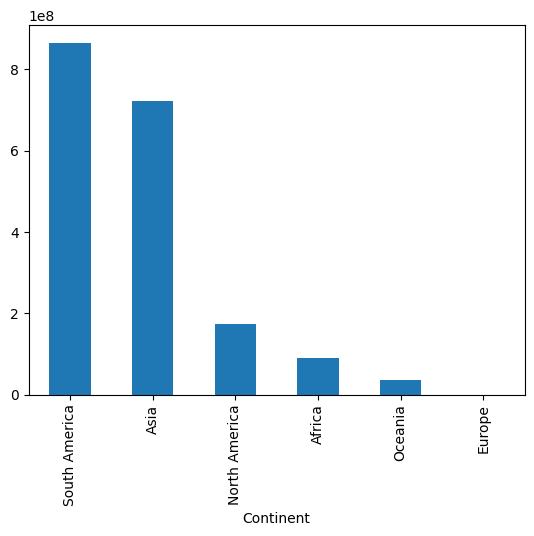

In [190]:
df_con['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

In [191]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

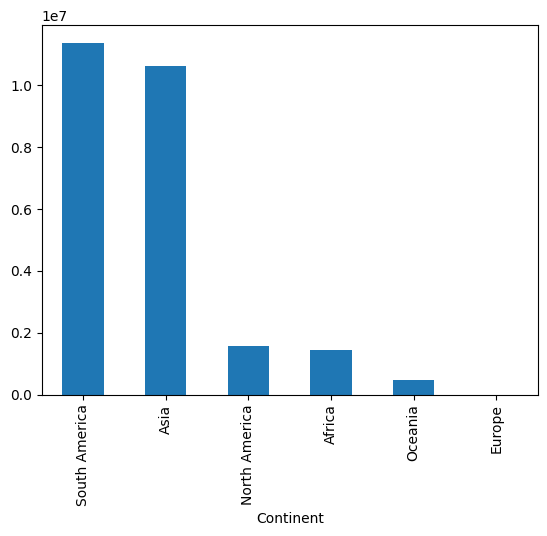

In [192]:
df_con['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

In [198]:
de_comn=df_con['Acreage(Hectare)'].sort_values(ascending=False)

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

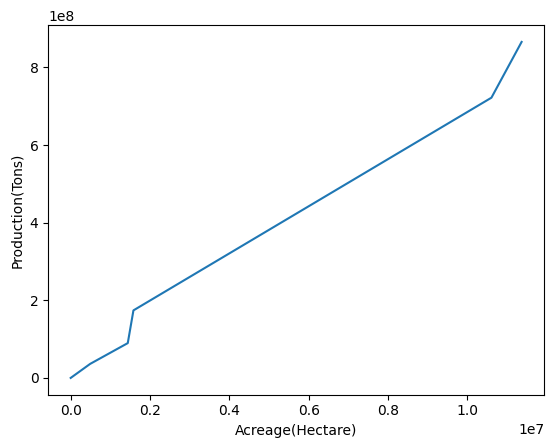

In [196]:
sns.barplot(data=df_con,x=de_co,y=df_con['Production(Tons)'])

In [200]:
df_con.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.522211,0.994897,0.091201
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000


<Axes: ylabel='Production(Tons)'>

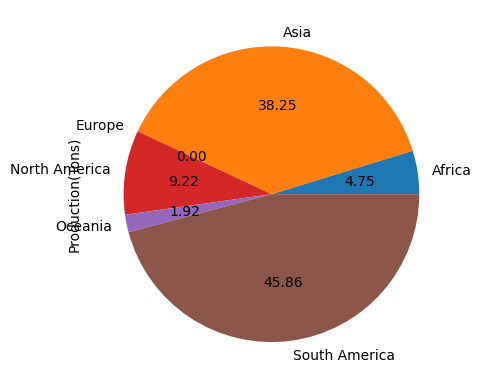

In [203]:
df_con['Production(Tons)'].plot(kind='pie',autopct='%.2f')